## Home Credit Default Risk Competition
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction  

대출자가 부동산 대출 상환을 정해진 날짜에 할지 말지 0, 1 을 예측하는 분류모델.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
print(os.listdir('./input/House/'))
# 경로에 10개의 파일이 있음.

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
train = pd.read_csv('./input/House/application_train.csv')
print('Training data shape:', train.shape)
train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test = pd.read_csv('./input/House/application_test.csv')
print('Testing data shape:', test.shape)
test.head()
# train set 과는 target 이 있고 없고의 차이.

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1. Target variable 은 binary(0 or 1). 0이 갚는 사람, 1이 늦게 갚는사람
2. column 은 121 개
3. 결측치를 확인한다
4. EDA 진행한다.
5. 데이터에 대해서 조금 더 알아본다.

In [5]:
# EDA
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
print('Target variable Ratio : {:.2f}%'.format(100*train['TARGET'].value_counts()[1]/len(train)))

Target variable Ratio : 8.07%


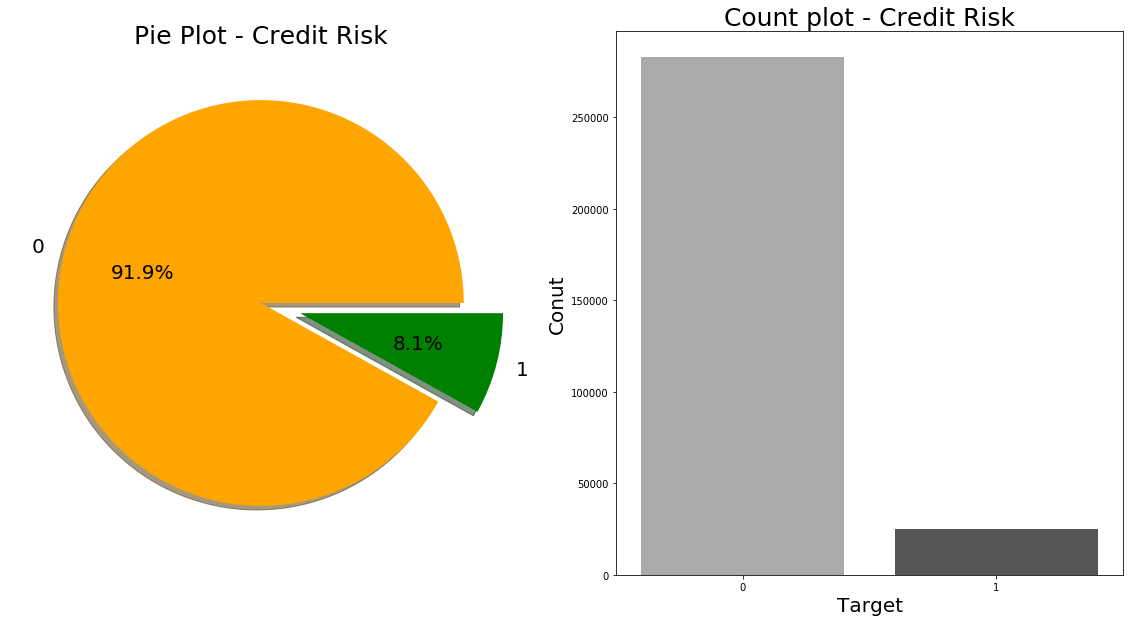

In [7]:
# target variable 시각화 그림이 별로 마음에 안들어서 이전에 썼던 다른 그림으로 대체
# Target Variable plot
f, ax = plt.subplots(1,2, figsize=(20, 10))

# pie chart -> sns plot 이나 pyplot 으로 바꿔보기
train['TARGET'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', 
                                        ax=ax[0], shadow=True, fontsize=20, colors=['orange', 'green'])
ax[0].set_title('Pie Plot - Credit Risk', fontsize=25)
ax[0].set_ylabel('')

# count plot
sns.countplot('TARGET', data=train, ax=ax[1], palette='binary')
ax[1].set_title('Count plot - Credit Risk', fontsize=25)
plt.ylabel('Conut', fontsize=20)
plt.xlabel('Target', fontsize=20)

plt.show()

타겟 변수의 불균형이 발생했음을 알 수 있음.  
1 이 8% 정도 0 이 92% 정도. undersampling 이 필요함.  
모델링할 때 데이터 조절이 필요함.  
plot.pie 안에 글씨 크기 조절 fontsize
색상조절은 colors 하고 개수만큼 리스트로 색상 나열

sns.countplot 색상은 palette, color
label은 따로 plt.ylabel, xlabel 해주고 fontsize

([<matplotlib.patches.Wedge at 0x22cd6a10cc8>,
 [Text(-1.0648123216659293, 0.27599768047650985, ''),
  Text(1.258414554334053, -0.32617910638210273, '')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%'),
  Text(0.7744089565132634, -0.20072560392744784, '8.1%')])

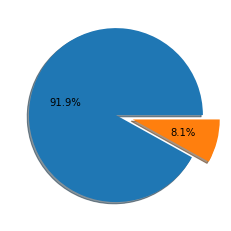

In [8]:
x = train['TARGET'].value_counts()
plt.pie(x, explode=(0, 0.2), autopct='%1.1f%%', shadow=True)
# 이걸 조금 다듬으면 pd.plot.pie 대신 사용 가능

In [9]:
# Examine Missing Values
# number and percentage of missing values in each columns
def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()
    # percentage of missing values
    mis_val_percent = 100*df.isnull().sum() / len(df)
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(mis_val_table_ren_columns.shape[0]) +
         ' columns that have missing values.')
    
    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


아까 train set column이 122개 였는데 결측치 존재하는 column 이 122개.  
즉 모든 column에 결측치가 존재한다.  
결측치 비율 많은건 70% 정도까지 존재함. -> 결측치가 엄청 많음.  
숫자 말고 시각화로도 결측치가 어느 정도 되는지 보는게 좋겠음. 감이 확오게

In [11]:
# 결측치 시각화 라이브러리 missingno
import missingno as msno

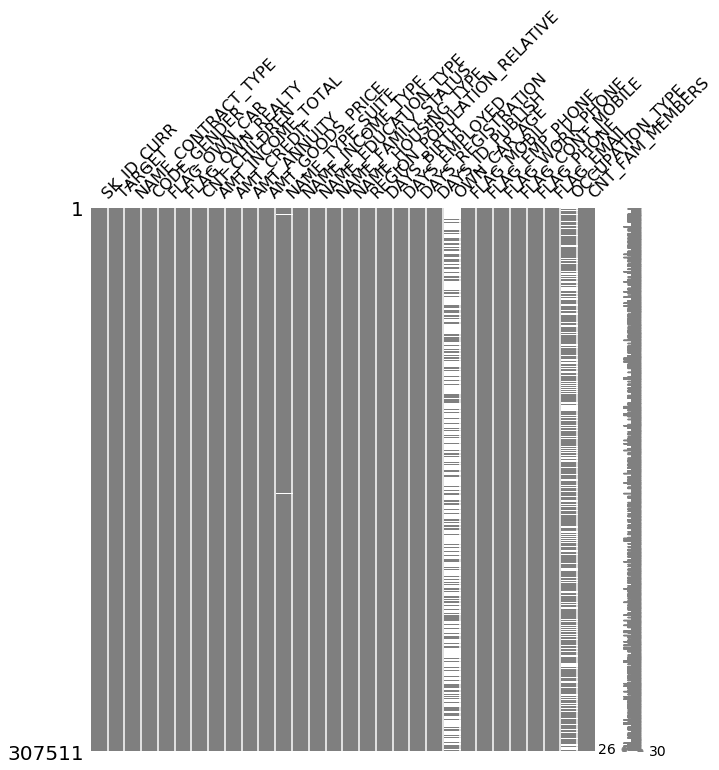

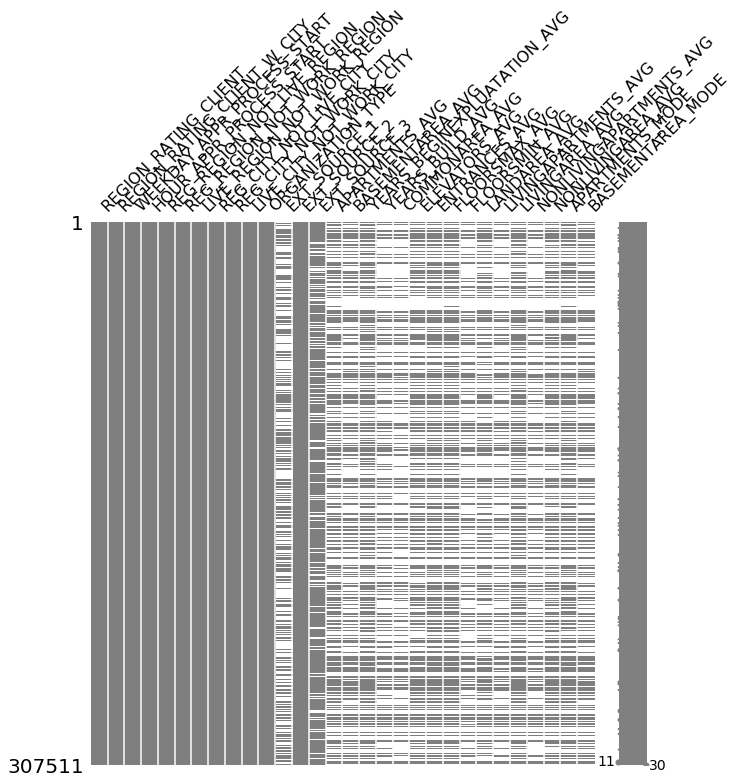

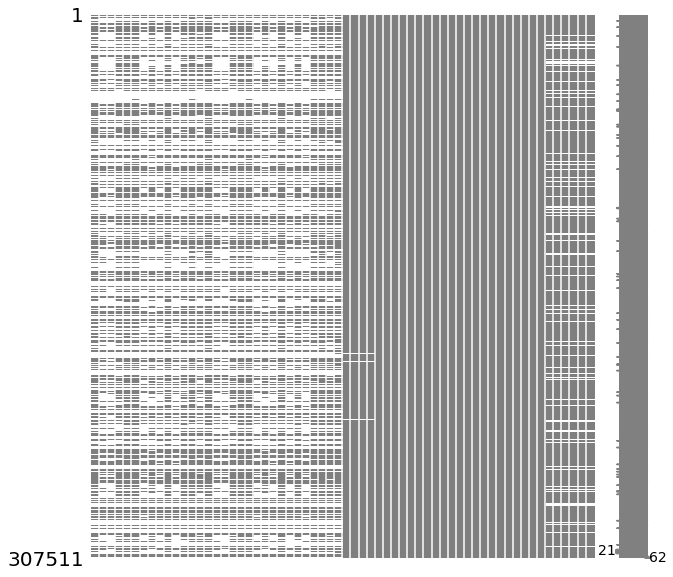

In [12]:
msno.matrix(df=train.iloc[:, :30], figsize=(10, 10), color=(0.5, 0.5, 0.5))
msno.matrix(df=train.iloc[:, 30:60], figsize=(10, 10), color=(0.5, 0.5, 0.5))
msno.matrix(df=train.iloc[:, 60:], figsize=(10, 10), color=(0.5, 0.5, 0.5))

결측치가 없는 column 도 있지만 많은 곳은 정말 많다는 것을 알 수 있음.  
결측치가 많은 column 을 어떻게 처리할 것인지 고민해봐야함.  
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.  
XGboost 는 결측치를 내부적으로 처리해준다? -> 그렇다고함. 무슨 원리인지는?

In [15]:
# Column types
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [16]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
# 특정 dtype 의 column 만 선택해주는 함수. select_dtype('dtype')
# apply 는 함수 적용
# nunique() : NaN 을 제외한 unique 의 개수를 구해줌. axis = 0 이면 행을 말함.

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

categorical data 는 encoding 을 해줘야 한다.  
컴퓨터, 모델이 읽을 수 있는 타입으로 만드는 것을 인코딩이라고 함.  
Label encoding, One-Hot encoding 이라는 것이 있음.  
라벨 인코딩은 카테고리가 2개만 있을 경우를 제외하고는 추천하지 않고 대부분 원-핫 인코딩을 해주는 것이 좋고 일반적이다.  
인코딩 방법도 많이 있음. 프로젝트마다다르게 해야함. 차원 축소하면서 인코딩하는 방법도 있음. 

In [19]:
# Label Encoding and One-hot encoding
# for label encoding, use scikit learn 'LabelEncoder'and for one-hot encoding, use pandas get_dummies(df) 

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
# One-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

# 원핫 인코딩으로 더미변수 생성해서 column 이 늘어난 것을 확인할 수 있음. 

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [22]:
# align dataframe 을 만들어라. 조정? 나란한? 함치는 것 같은데 inner 나 axis 봤을때
train_label = train['TARGET']

train, test = train.align(test, join = 'inner', axis=1)
train['TARGET'] = train_label

print('Training Features shape :', train.shape)
print('Testing Features shape :', test.shape)

Training Features shape : (307511, 240)
Testing Features shape : (48744, 239)


pandas.dataframe.align  
Align two objects on their axes with the specified join method for each axis index  
데이터 프레임을 join 하는 함수이다. series 도 가능.   
df.align(other, join='inner, outer, left, right', axis, method, level, copy)  
  
여러가지 차원축소 방법 https://en.wikipedia.org/wiki/Dimensionality_reduction

In [23]:
# EDA - Anomalies Data
# 나이 데이터 같은데, 뭔가 잘못되어있다고함. 음수값? 나이가 아니라 남은 상환일? 뭐 이런거 일 수도 있음. 
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [24]:
train['DAYS_EMPLOYED'].describe()
# 이상한 데이터가 있다. 뭐 이런걸 describe 로 보여주려는 것 같음.

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

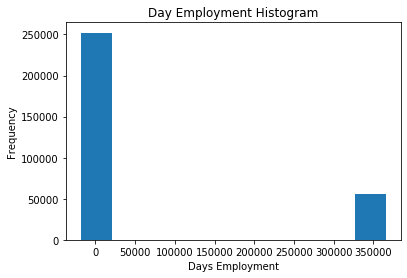

In [27]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Day Employment Histogram');
plt.xlabel('Days Employment')

# 이상치가 있는 걸 보여주고 싶었던 것 같은데, 잘 보이기는 하는데
# 이거말고 다른 그림이 더 좋지 않을까 싶은 생각이 들음. -> kde 나 violin. x축이 너무 넓어서 안되려나?  

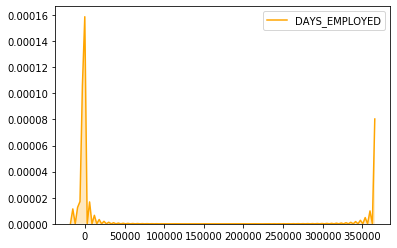

In [38]:
sns.kdeplot(train['DAYS_EMPLOYED'], bw='silverman', shade=True, color='orange')
# histogram 보다는 kdeplot 이 이상치를 더 잘 보여주는 것 같음.

In [40]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

# 이상치? 라고 보면 될 것 같음. 그걸 describe 로 파악을 했고 그래프 그려봤고
# 이상치 중에서 1 인 비율, 이상치 아닌 것 중에서 1의 비율을 print 한 것.
# 그리고 마지막은 anomalous 데이터의 수

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days employment')

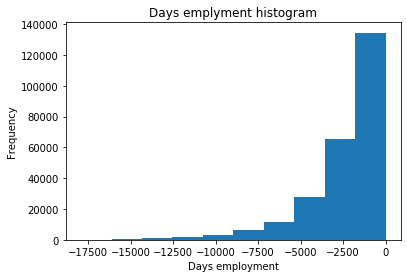

In [41]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243
# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days emplyment histogram');
plt.xlabel('Days employment')

In [42]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (test['DAYS_EMPLOYED_ANOM'].sum(), len(test)))

There are 9274 anomalies in the test data out of 48744 entries


In [43]:
# Correlations
# correlations between the features and the target. dtype 은 float64
correlations = train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))
# 15개만 보여줌. 양, 음 따라 다르게
# 변수가 너무 많아서 히트맵 그리기 어려움. 아까 float 이랑 int 만 100개가 넘었음

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [44]:
# find the correlation of the positive days since birth and target
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982737

In [45]:
# set the style of plots
plt.style.use('fivethirtyeight')

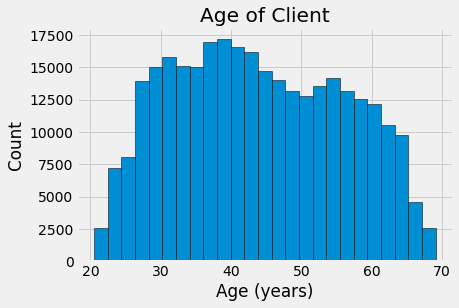

In [46]:
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

# bins 는 구간을 몇개로 쪼갤 것인지

Text(0, 0.5, 'Density')

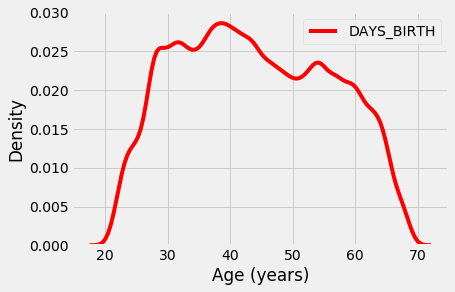

In [52]:
sns.kdeplot(train['DAYS_BIRTH']/365, color='red')
plt.xlabel('Age (years)')
plt.ylabel('Density')
# 30-40 대가 많고 50 초반도 많다.

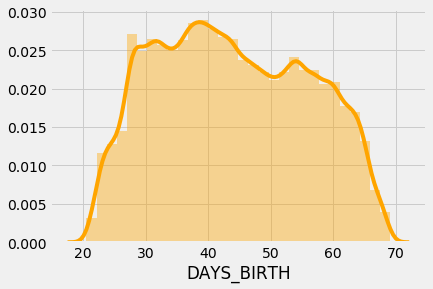

In [62]:
sns.distplot(train['DAYS_BIRTH']/365, color='orange', bins=30, norm_hist=True)
# 셋 중에 뭘로 보든 나이의 분포를 파악하기에는 좋음. hist 보다는 선으로 된게 더 좋지 않나 싶음.  

Text(0.5, 1.0, 'Distribution of Ages')

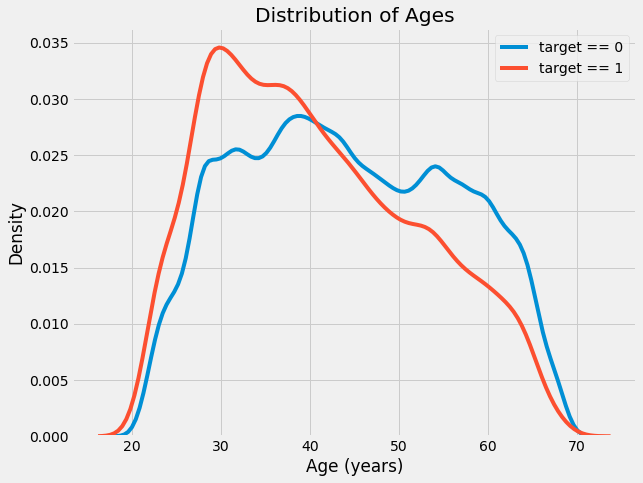

In [63]:
plt.figure(figsize=(9,7))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

# 나이에 따른 0과 1의 차이가 있음을 알 수 있다. 

In [67]:
# Age information into a separate dataframe
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


pd.cut : 동일한 길이로 나누어서 범주 만들기  
동일한 길이로 나눠서 범주 만드는 것은 자동으로 되는 것 같음. 다만 원하는 특정 길이로 만드려면 범위 지정해서 따로 적어줘야함.  
pd.qcut : 동일한 개수로 나누어서 범주 만들기 (범주 안에 동일한 개수 들어오도록)  

pd.cut( 나누고 싶은 data, bins=나누고 싶은 개수)  
참고 https://rfriend.tistory.com/404

In [68]:
# 나눴던 구간들로 groupby 가 가능. groupby 해서 여러 연산 적용.
# 여러 연산을 적용하고 싶으면 agg(['원하는 통계 함수'])
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [75]:
age_data.groupby('YEARS_BINNED').agg(['mean', 'sum'])

TARGET          DAYS_BIRTH            YEARS_BIRTH  \
                  mean   sum          mean        sum        mean   
YEARS_BINNED                                                        
(20.0, 25.0]  0.123036  1496   8532.795625  103750262   23.377522   
(25.0, 30.0]  0.111436  3662  10155.219250  333720815   27.822518   
(30.0, 35.0]  0.102814  4055  11854.848377  467555220   32.479037   
(35.0, 40.0]  0.089414  3833  13707.908253  587630611   37.555913   
(40.0, 45.0]  0.078491  3250  15497.661233  641696161   42.459346   
(45.0, 50.0]  0.074171  2606  17323.900441  608675242   47.462741   
(50.0, 55.0]  0.066968  2340  19196.494791  670763921   52.593136   
(55.0, 60.0]  0.055314  1832  20984.262742  694998782   57.491131   
(60.0, 65.0]  0.052737  1449  22780.547460  625918322   62.412459   
(65.0, 70.0]  0.037270   302  24292.614340  196843054   66.555108   

                            
                       sum  
YEARS_BINNED                
(20.0, 25.0]  2.842473e+05  
(25.0, 30.0]  9.143036e+05  
(30.0, 35.0]  1.280973e+06  
(35.0, 40.0]  1.609947e+06  
(40.0, 45.0]  1.758072e+06  
(45.0, 50.0]  1.667603e+06  
(50.0, 55.0]  1.837709e+06  
(55.0, 60.0]  1.904106e+06  
(60.0, 65.0]  1.714845e+06  
(65.0, 70.0]  5.392960e+05

Text(0.5, 1.0, 'Failure to Repay b Age Group')

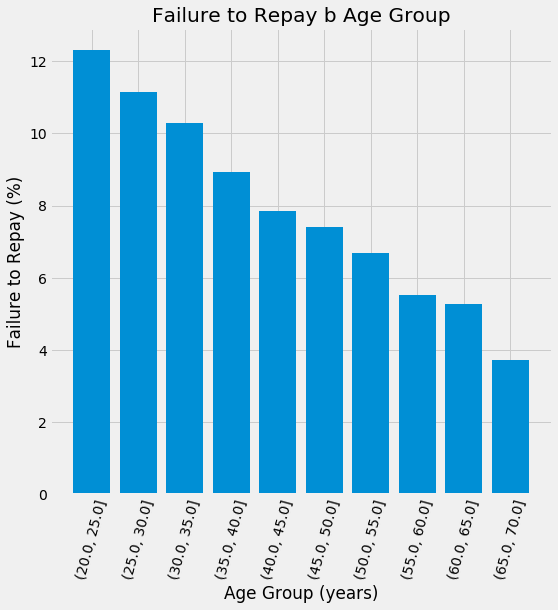

In [76]:
plt.figure(figsize=(8, 8))

plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

plt.xticks(rotation=75)
plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay b Age Group')

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.